<a href="https://colab.research.google.com/github/rimanoble04/DS-tutorial/blob/main/Dstut1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
path= "/content/drive/My Drive/Data Science /Advertising.csv"
df= pd.read_csv(path)

In [4]:
x=df[['TV','radio','newspaper']]
y=df['sales']

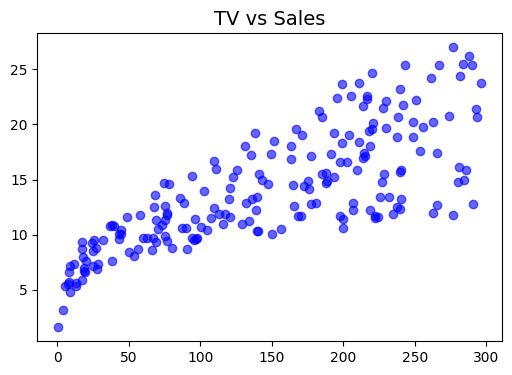

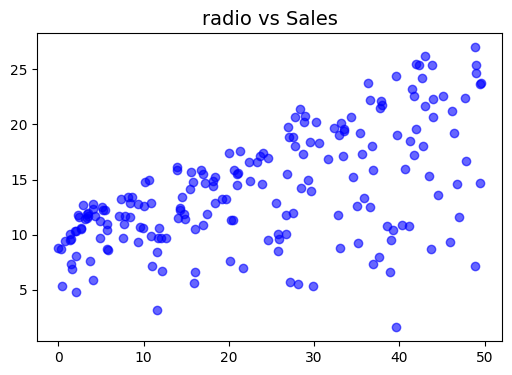

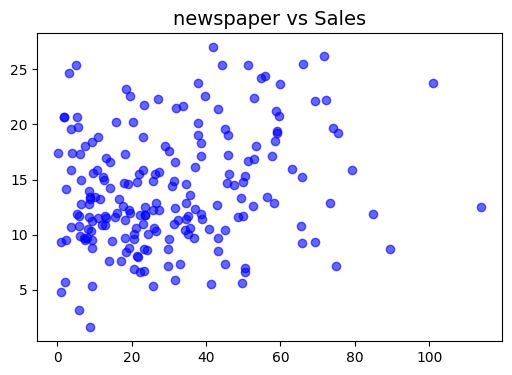

In [5]:
import matplotlib.pyplot as plt

for i in x:
    plt.figure(figsize=(6,4))
    plt.title(f'{i} vs Sales', fontsize=14)
    plt.scatter(df[i],y,alpha=0.6,color='blue')
    plt.show()

In [10]:
# from sklearn.linear_model import LinearRegression

# for i in x:

#     model=LinearRegression()
#     model.fit(x[[i]],y)
#     pred_y=model.predict(x[[i]])
#     plt.scatter(df[i],pred_y,alpha=0.6,color='blue')
#     plt.plot(df[[i]], pred_y, color='red', label='Regression Line')
#     plt.show()

#     R_sq=model.score(x[[i]],y)
#     print(R_sq)

In [7]:
sum_X = np.sum(x, axis=0)
sum_y = np.sum(y)

mean_X = np.mean(x, axis=0)
mean_y = np.mean(y)

print(f"Sum of X: {sum_X}")
print(f"Sum of y: {sum_y}")
print(f"Mean of X: {mean_X}")
print(f"Mean of y: {mean_y}")

Sum of X: TV           29408.5
radio         4652.8
newspaper     6110.8
dtype: float64
Sum of y: 2804.5
Mean of X: TV           147.0425
radio         23.2640
newspaper     30.5540
dtype: float64
Mean of y: 14.0225


In [9]:
# Add a column of ones for the intercept
X = np.column_stack((np.ones(x.shape[0]), x))

# Calculate regression coefficients using np.linalg.solve()
XT_X = x.T @ x  # Compute X^T X
XT_y = x.T @ y  # Compute X^T y
beta = np.linalg.solve(XT_X, XT_y)  # Solve for beta

print(f"Regression Coefficients (Beta): {beta}")

y_pred = x @ beta

# Calculate SSres and SStot
SS_res = np.sum((y - y_pred) ** 2)  # Residual Sum of Squares
SS_tot = np.sum((y - mean_y) ** 2)  # Total Sum of Squares

# Compute R²
R_squared = 1 - (SS_res / SS_tot)

# Compute F-statistic
n, k = x.shape[0], x.shape[1] - 1
F_stat = (R_squared / k) / ((1 - R_squared) / (n - k - 1))

print(f"Residual Sum of Squares (SS_res): {SS_res:.4f}")
print(f"Total Sum of Squares (SS_tot): {SS_tot:.4f}")
print(f"R²: {R_squared:.4f}")
print(f"F-statistic: {F_stat:.4f}")

Regression Coefficients (Beta): [0.05379188 0.22222731 0.01681639]
Residual Sum of Squares (SS_res): 809.0430
Total Sum of Squares (SS_tot): 5417.1488
R²: 0.8507
F-statistic: 561.0313


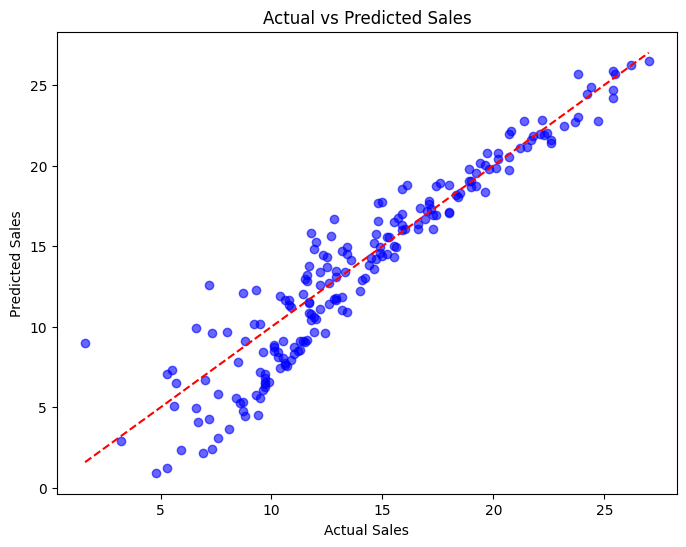

In [12]:
#Scatter plot for actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label="Perfect Fit Line")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()